<a href="https://colab.research.google.com/github/YogaBala2/FUTURE_DS_03/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installing textblob
!pip install textblob wordcloud vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.5 MB/s eta 0:00:00


In [ ]:
#importing all the packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [ ]:
from google.colab import files
uploaded = files.upload()

# Loading the  dataset
df = pd.read_csv("student_feedback.csv")
#head(10)->this gives first 10 rows in a dataset
df.head(10)


Saving student_feedback.csv to student_feedback.csv


,S.No,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9
5,5,832,7,2,7,8,3,5,1,4
6,6,772,9,3,5,2,10,3,8,1
7,7,961,9,8,7,4,4,3,3,10
8,8,814,6,5,8,6,4,4,7,9
9,9,863,5,9,4,7,9,4,4,5


In [ ]:
# Droping  unnecessary columns in the dataset
df = df.drop(columns=["S.No","Student ID"])
df.head()

,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,5,2,7,6,9,2,1,8
1,6,5,8,6,2,1,2,9
2,7,7,6,5,4,2,3,1
3,9,6,7,1,5,9,4,6
4,8,10,8,4,6,6,9,9


In [ ]:
#tail() -> gives the information of last 5 rows
df.tail()

,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
996,8,7,6,2,5,7,7,9
997,5,5,6,5,6,7,6,1
998,9,5,8,3,8,1,1,2
999,10,2,7,4,3,4,10,1
1000,7,2,4,2,1,5,9,9


In [ ]:
#overall statistics of dataset
df.describe()


,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,7.497502,6.081918,5.942058,5.430569,5.474525,5.636364,5.662338,5.598402
std,1.692998,2.597168,1.415853,2.869046,2.874648,2.920212,2.891690,2.886617
min,5.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,8.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000
75%,9.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
# Checking the missing values
df.isnull().sum()
#no missing where found in our dataset

,0
Well versed with the subject,0
Explains concepts in an understandable way,0
Use of presentations,0
Degree of difficulty of assignments,0
Solves doubts willingly,0
Structuring of the course,0
Provides support for students going above and beyond,0
Course recommendation based on relevance,0


In [ ]:
#finding the avg score for each column
avg_scores = df.mean()
avg_scores

,0
Well versed with the subject,7.497502
Explains concepts in an understandable way,6.081918
Use of presentations,5.942058
Degree of difficulty of assignments,5.430569
Solves doubts willingly,5.474525
Structuring of the course,5.636364
Provides support for students going above and beyond,5.662338
Course recommendation based on relevance,5.598402


/tmp/ipython-input-3694599755.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_scores.index, y=avg_scores.values, palette="viridis")


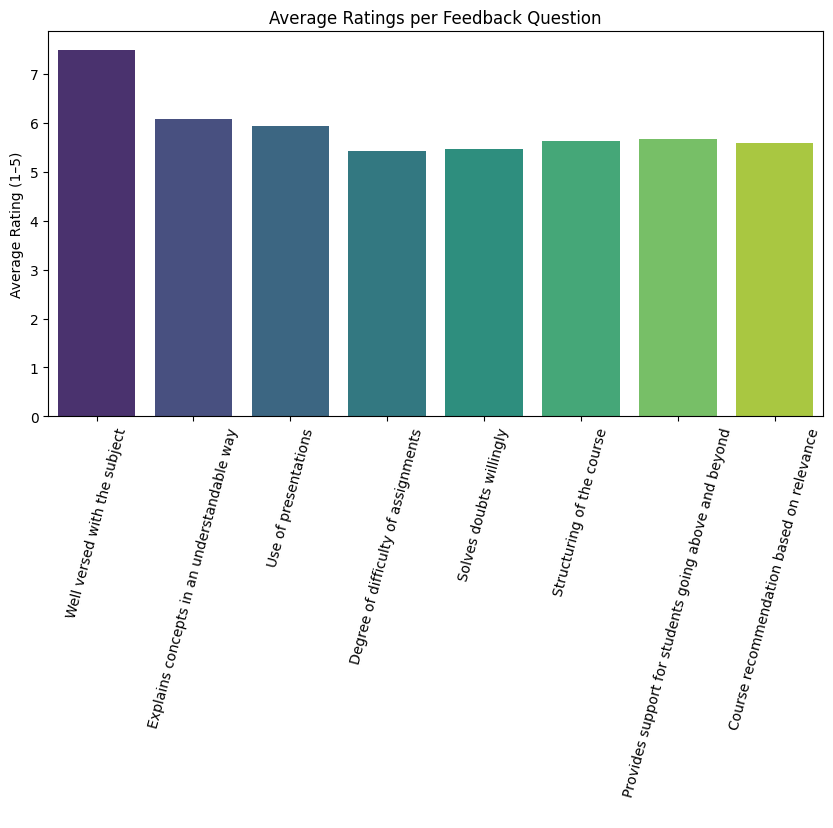

In [ ]:
#Average Ratings per Feedback Question.
plt.figure(figsize=(10,5))
sns.barplot(x=avg_scores.index, y=avg_scores.values, palette="viridis")
plt.xticks(rotation=75)
plt.title("Average Ratings per Feedback Question")
plt.xlabel(" ")
plt.ylabel("Average Rating (1–5)")
plt.show()


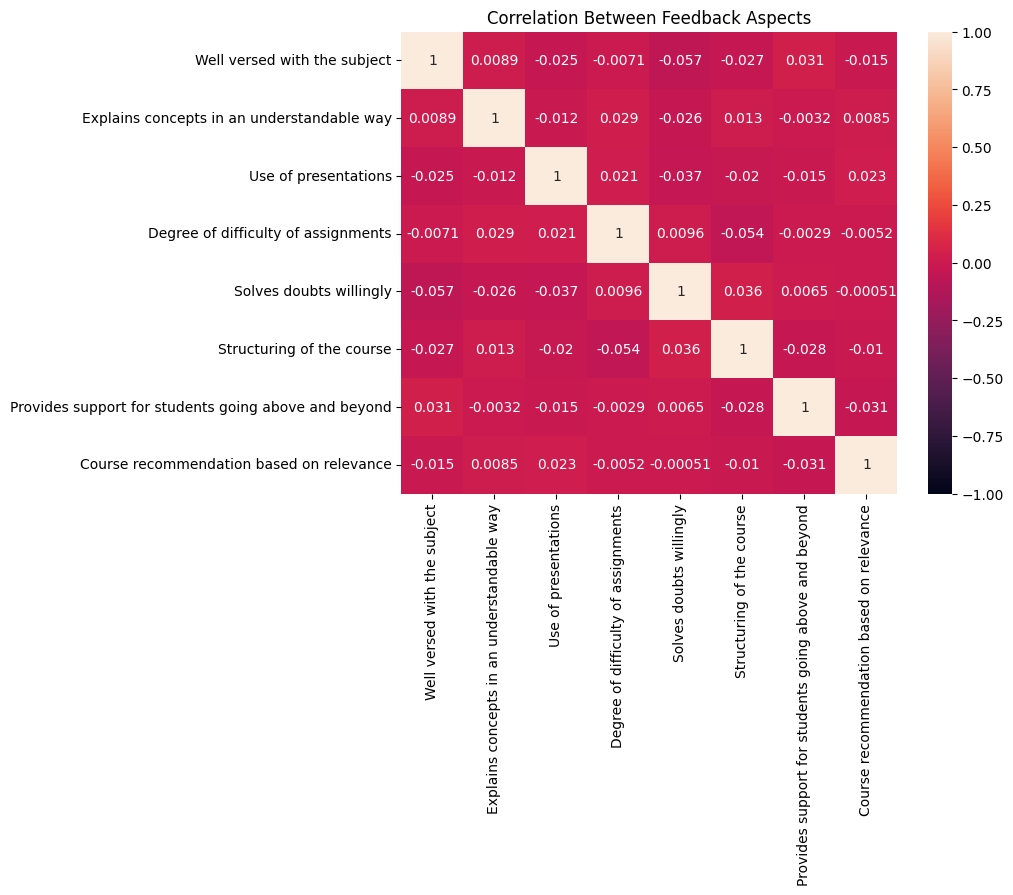

In [ ]:
#finding the correlation between each columns
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.title("Correlation Between Feedback Aspects")
plt.show()


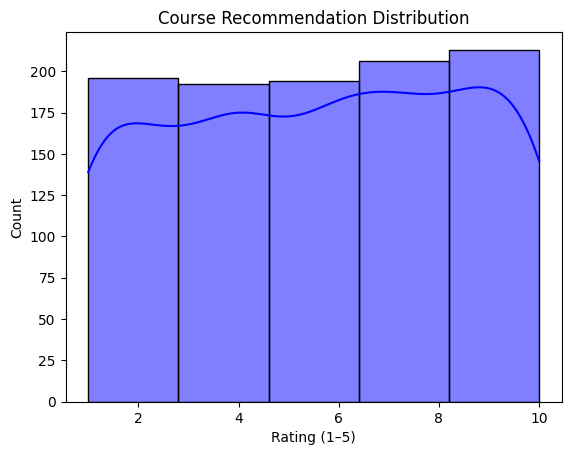

In [ ]:
sns.histplot(df['Course recommendation based on relevance'], bins=5, kde=True, color="blue")
plt.title("Course Recommendation Distribution")
plt.xlabel("Rating (1–5)")
plt.show()
